In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement

- **Primary Goal** 
 - Recognizing **Purchase pattern** of Products wrt. Age , Education , Income , Gender etc.
 - Indentifying **customer segments,profiling and formulating markerting strategy**
 - How to **drive sales of products and revenue** , across product categories
       - Data driven discounting / offers among customer segments
         
- **Statistical summary**
 - More **likelihood of purchase**
 - Range / Limitation of data  

- **Long term benefits** : Sales growth , Customer acquisition  and retention  

In [301]:
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Basic Analysis

- **Analysing metrics** - Basic metrics
 - Observations on **shape** of data
 - **Data types** of all the attributes
 - **Conversion** of categorical attributes to 'category' (If required)
 - Statistical summary

In [302]:
df.shape

(180, 9)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- **Conversion** - to 'category' 
 - Age to Age_generation 
 - Income to Income_category 
 - Fitness to Fitness_level
 - Education to Education_category

In [304]:
# Gen Z	 10 – 25
# Millennials	26 – 41
# Younger millennials (25 to 32 years old) 
# Older ones (33 to 40 years old)
# Gen X	42 – 57

In [305]:
def age_to_generation(age):
    if age >= 10 and age <= 25:
        return 'Gen-Z'
    elif age >= 26 and age <= 32:
        return 'Younger-Millennials'
    elif age >= 33 and age <= 41:
        return 'Older-Millennials'
    else:
        return 'Gen-X' 

In [306]:
df["Age_generation"] = df["Age"].apply(age_to_generation)

In [307]:
# Source - https://en.wikipedia.org/wiki/Education_in_the_United_States#:~:text=Students%20normally%20attend%2012%20grades,(18%20in%20some%20states).
def education_to_category(years_of_education):
    if years_of_education  <= 13:
        return 'School'
    elif years_of_education >= 14 and years_of_education <= 17:
        return 'High-School'
    elif years_of_education >= 18 and years_of_education <= 21:
        return 'Undergraduate-School'
    elif years_of_education > 21:
        return 'Graduate school'

In [308]:
df["Education_category"] = df["Education"].apply(education_to_category)

In [309]:
def fitness_to_category(fitness):
    if fitness  == 1:
        return 'Poor'
    elif fitness == 2:
        return 'Below-Avg'
    elif fitness == 3:
        return 'Average'
    elif fitness == 4:
        return 'Above-Avg'
    else:
        return 'Excellent'

In [310]:
df["Fitness_category"] = df["Fitness"].apply(fitness_to_category)

In [311]:
# Source - https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system#:~:text=The%20lowest%2Dincome%20group%20earned,topping%20%24145%2C000%20in%202018%20dollars.
#Poor or near-poor	$32,048 or less
#Lower-middle class	$32,048 - $53,413
#Middle class	$53,413 - $106,827
#Upper-middle class	$106,827 - $373,894
#Rich	$373,894 and up

In [312]:
def income_to_category(income):
    if income  < 32048:
        return 'Poor-Income'
    elif income >= 32048 and income < 53413:
        return 'Lower-Middle-Income'
    elif income >= 53413 and income < 106827:
        return 'Middle-Income'
    elif income >= 106827 and income < 373894:
        return 'Upper-Middle-Income'
    else:
        return 'Rich-Income' 

In [313]:
df["Income_category"] = df["Income"].apply(income_to_category)

In [314]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [315]:
df.describe(include='object')

,Product,Gender,MaritalStatus,Age_generation,Education_category,Fitness_category,Income_category
count,180,180,180,180,180,180,180
unique,3,2,2,4,3,5,3
top,KP281,Male,Partnered,Gen-Z,High-School,Average,Lower-Middle-Income
freq,80,104,107,79,145,97,104


### Non-Graphical Analysis

- **Value counts** 
 - Age to Age_group 

In [316]:
df[["Product"]].value_counts()

Product
KP281      80
KP481      60
KP781      40
dtype: int64

In [317]:
df[["Gender"]].value_counts()

Gender
Male      104
Female     76
dtype: int64

In [318]:
df[["MaritalStatus"]].value_counts()

MaritalStatus
Partnered        107
Single            73
dtype: int64

In [319]:
df["Age_generation"].value_counts()

Gen-Z                  79
Younger-Millennials    51
Older-Millennials      39
Gen-X                  11
Name: Age_generation, dtype: int64

In [320]:
df["Education_category"].value_counts()

High-School             145
Undergraduate-School     27
School                    8
Name: Education_category, dtype: int64

In [321]:
df["Fitness_category"].value_counts()

Average      97
Excellent    31
Below-Avg    26
Above-Avg    24
Poor          2
Name: Fitness_category, dtype: int64

In [322]:
df["Income_category"].value_counts()

Lower-Middle-Income    104
Middle-Income           72
Poor-Income              4
Name: Income_category, dtype: int64

In [323]:
df[["Product","Gender","MaritalStatus"]].value_counts()

Product  Gender  MaritalStatus
KP281    Female  Partnered        27
         Male    Partnered        21
KP481    Male    Partnered        21
KP281    Male    Single           19
KP781    Male    Partnered        19
KP481    Female  Partnered        15
                 Single           14
KP781    Male    Single           14
KP281    Female  Single           13
KP481    Male    Single           10
KP781    Female  Partnered         4
                 Single            3
dtype: int64

- **Unique attributes** 

In [324]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [325]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [326]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [327]:
df["Age_generation"].unique()

array(['Gen-Z', 'Younger-Millennials', 'Older-Millennials', 'Gen-X'],
      dtype=object)

In [328]:
df["Education_category"].unique()

array(['High-School', 'School', 'Undergraduate-School'], dtype=object)

In [329]:
df["Fitness_category"].unique()

array(['Above-Avg', 'Average', 'Below-Avg', 'Poor', 'Excellent'],
      dtype=object)

In [330]:
df["Income_category"].unique()

array(['Poor-Income', 'Lower-Middle-Income', 'Middle-Income'],
      dtype=object)

### Visual Analysis - Univariate & Bivariate 

- For **continuous variable(s)**: **Distplot**, **countplot**, **histogram** for univariate analysis
 - Age 
 - Usage 
 - Fitness
 - Income
 - Miles

In [331]:
def distplot_histogram_continious(colnames):
    #plt.figure()
    for feature_name in colnames:
        sns.distplot(df[feature_name], hist=True, kde=True,
        bins=int(36), color = 'darkblue',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
        plt.show()

In [332]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


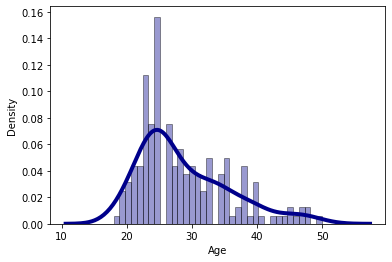

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


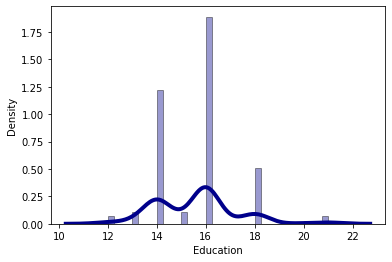

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


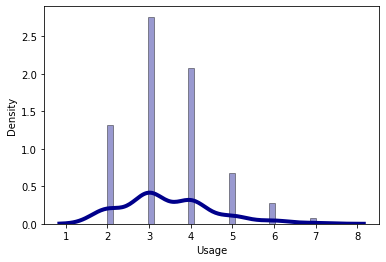

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


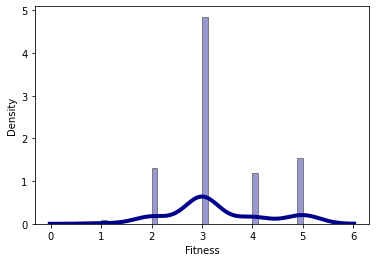

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


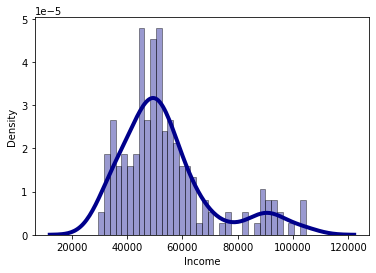

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


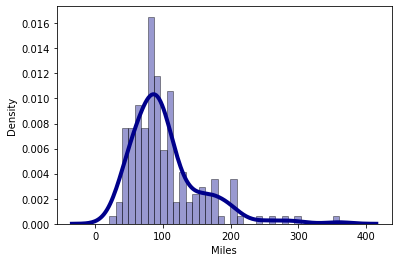

In [333]:
distplot_histogram_continious(continious_features)

- For **categorical** variable(s): **Boxplot**
 - Product 
 - Gender 
 - MaritalStatus
 - Age_generation
 - Education_category
 - Fitness_category
 - Income_category

In [340]:
categorical_features = df.select_dtypes(exclude=['int64','float64']).columns
categorical_features

Index(['Product', 'Gender', 'MaritalStatus', 'Age_generation',
       'Education_category', 'Fitness_category', 'Income_category'],
      dtype='object')

In [415]:
def boxplot_all_catogorical_vs_all_continious_features(feature_y_catg_list,feature_y_contn_list):
    plt.figure()
    for categorical_feature in feature_y_catg_list:
        for continious_feature in feature_y_contn_list:  
            sns.boxplot(x = categorical_feature, y=continious_feature, data=df)
            plt.show()


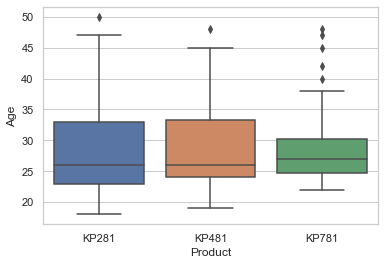

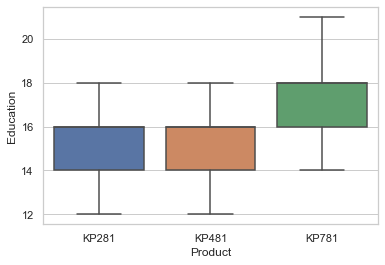

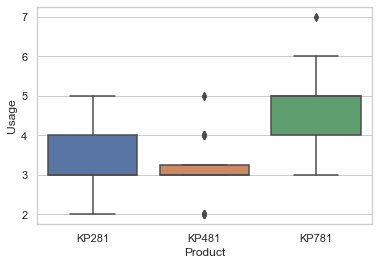

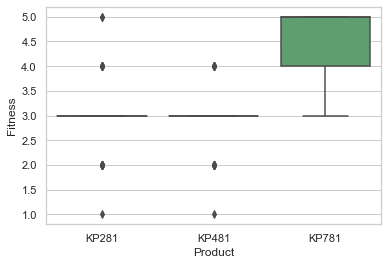

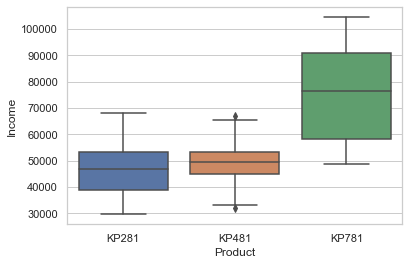

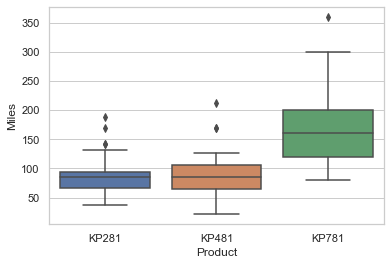

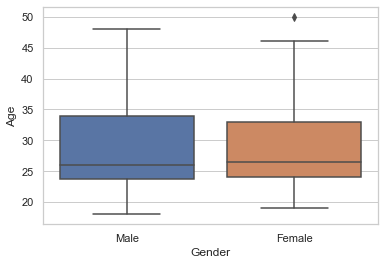

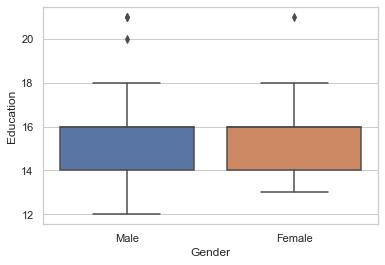

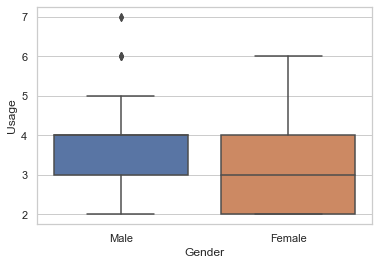

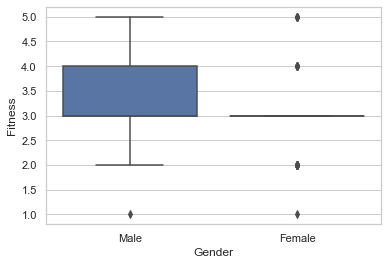

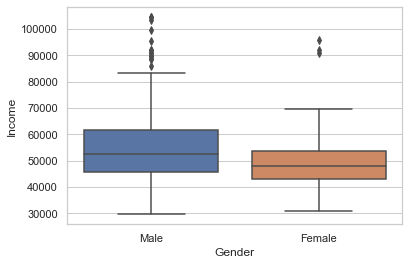

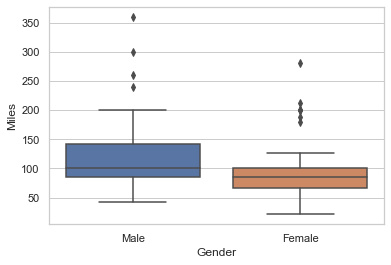

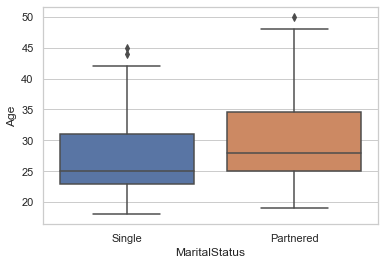

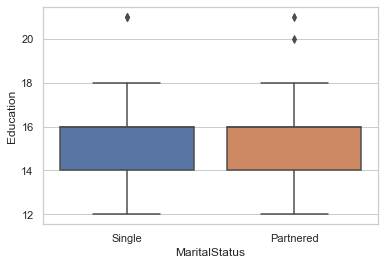

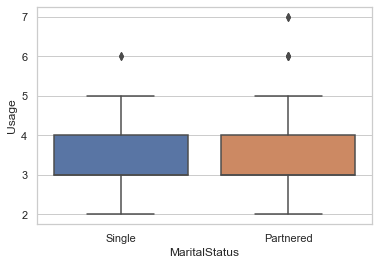

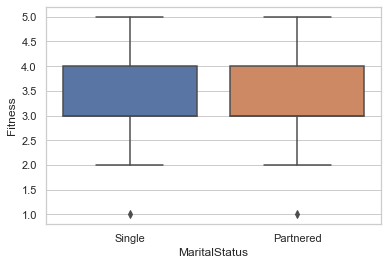

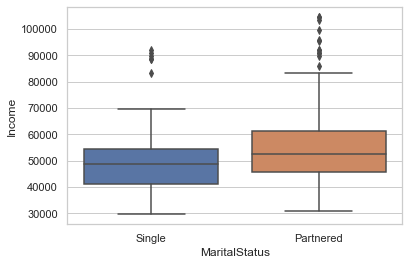

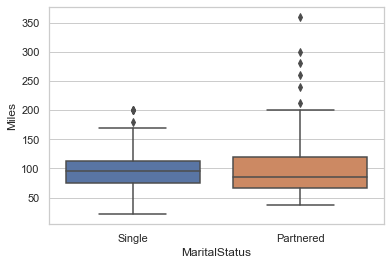

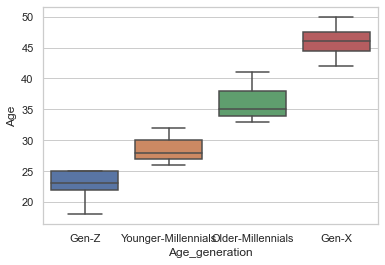

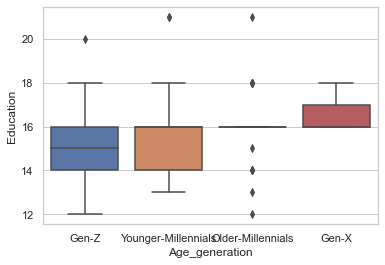

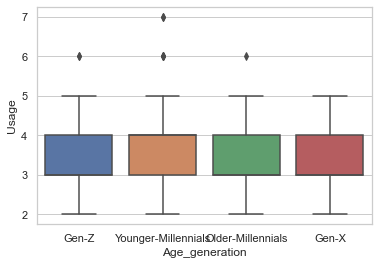

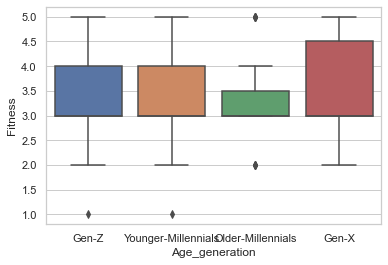

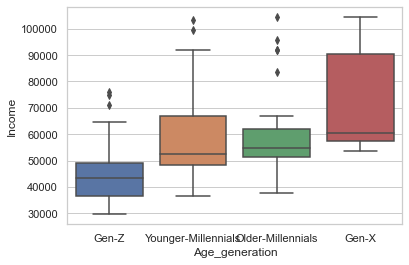

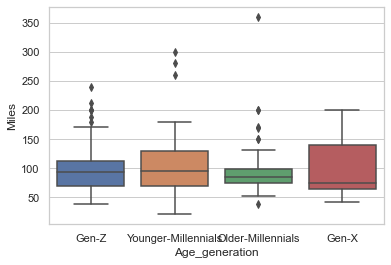

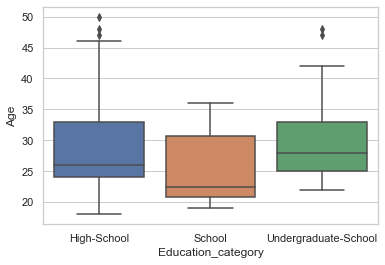

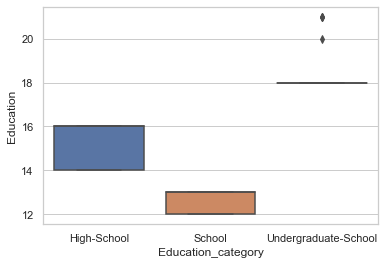

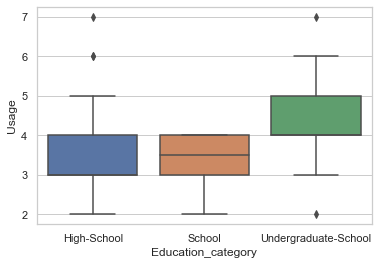

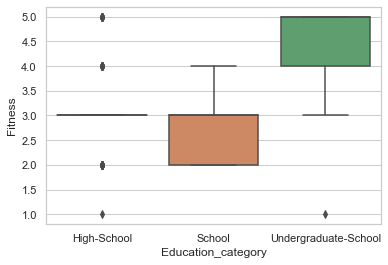

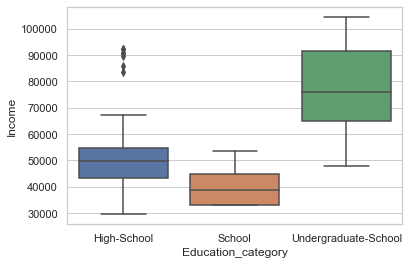

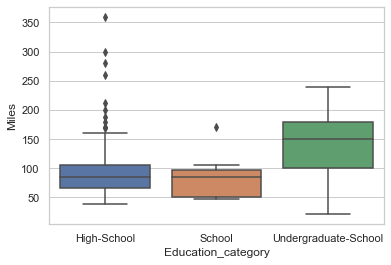

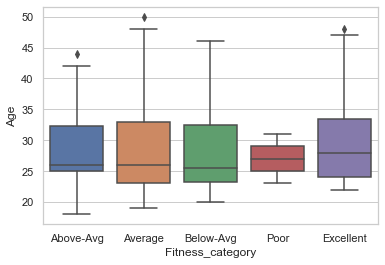

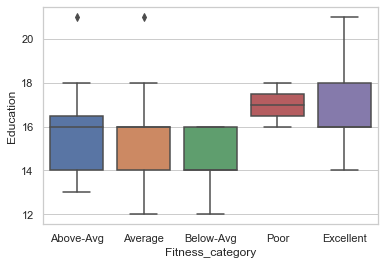

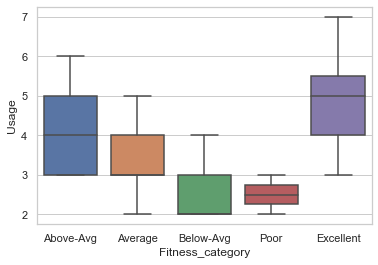

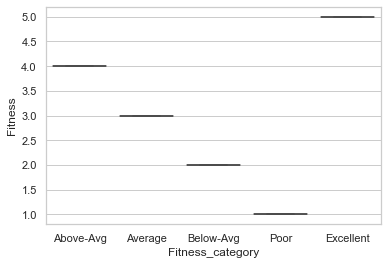

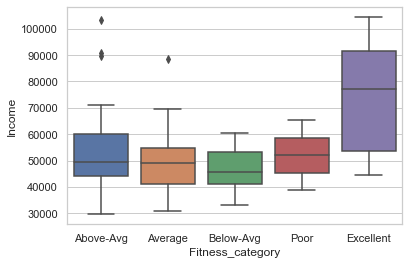

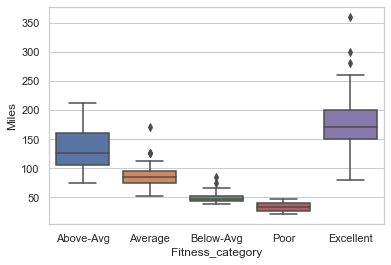

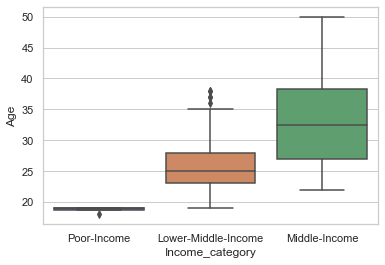

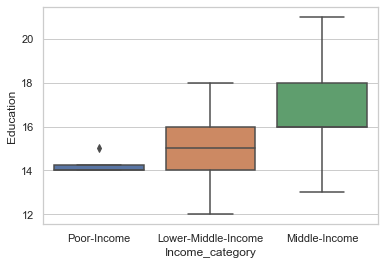

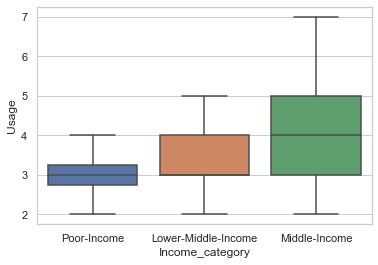

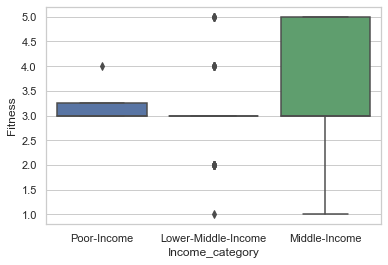

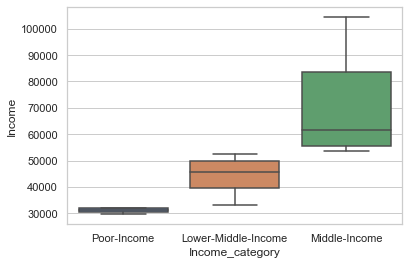

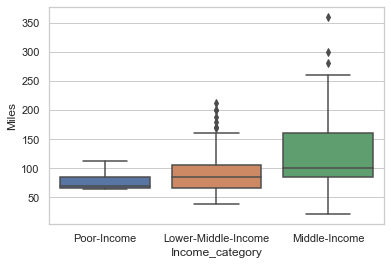

In [416]:
boxplot_all_catogorical_vs_all_continious_features(categorical_features,continious_features)

- For **categorial** variable(s): **countplot** for **Bivariate** analysis
 - Gender vs Product 
 - MaritalStatus vs Product 
 - Age_generation vs Product 
 - Education_category vs Product
 - Fitness_category vs Product
 - Income_category vs Product

In [390]:
def plot_products_by(feature_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    total = float(len(df))
    ax = sns.countplot(x="Product",  hue=feature_name, data=df)
    plt.legend(loc='upper right')
    plt.title('Products by '+feature_name, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
    plt.show()

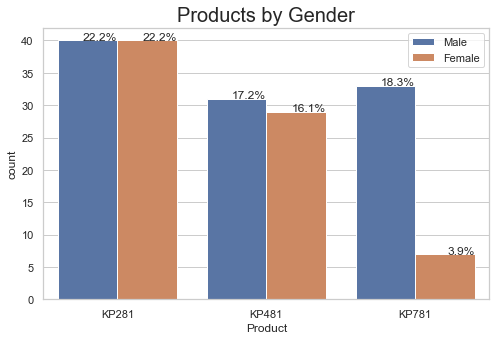

In [392]:
plot_products_by('Gender')

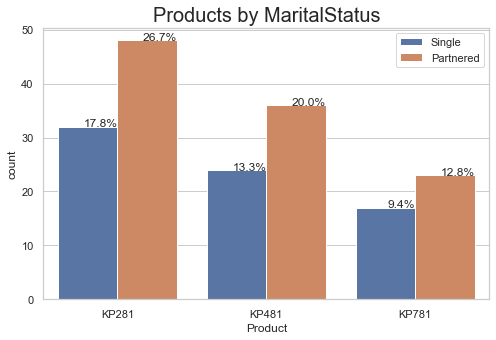

In [393]:
plot_products_by('MaritalStatus')

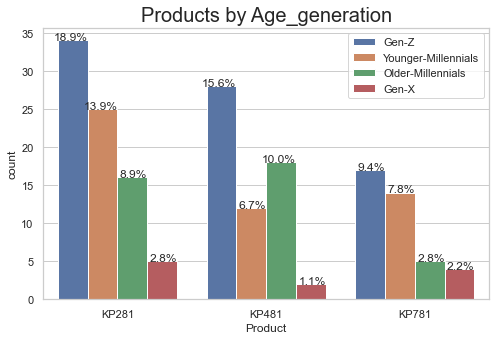

In [394]:
plot_products_by('Age_generation')

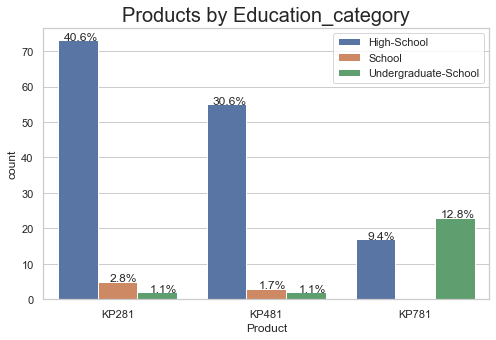

In [395]:
plot_products_by('Education_category')

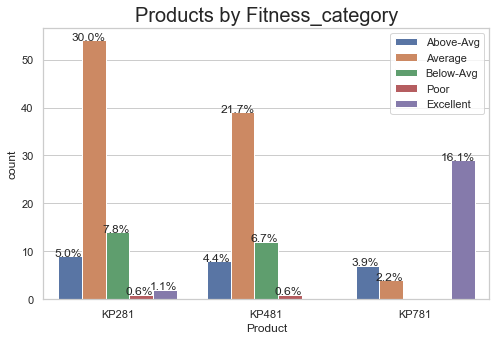

In [396]:
plot_products_by('Fitness_category')

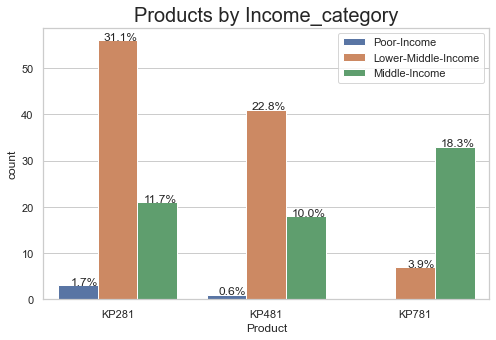

In [397]:
plot_products_by('Income_category')

In [442]:
def plot_products_by_multiple_categories(catg_feature_list,level_filter_name):
    for categorical_feature in catg_feature_list:
        if categorical_feature != level_filter_name and categorical_feature != "Product":
                sns.set(style="whitegrid")
                plt.figure(figsize=(8,5))
                total = float(len(df))
                ax = sns.catplot(x=categorical_feature, hue=level_filter_name, col="Product",data=df, kind="count")
                plt.title('Products by '+categorical_feature +" grouped by "+level_filter_name, fontsize=20)
                plt.show()

<Figure size 576x360 with 0 Axes>

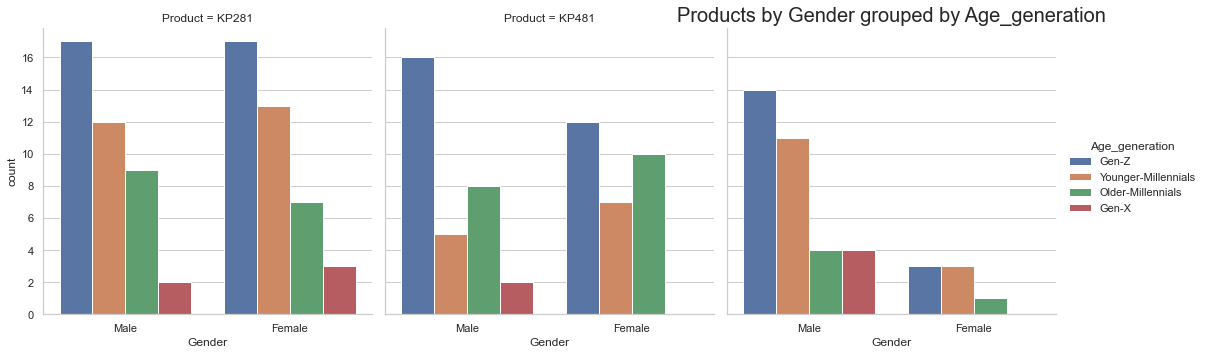

<Figure size 576x360 with 0 Axes>

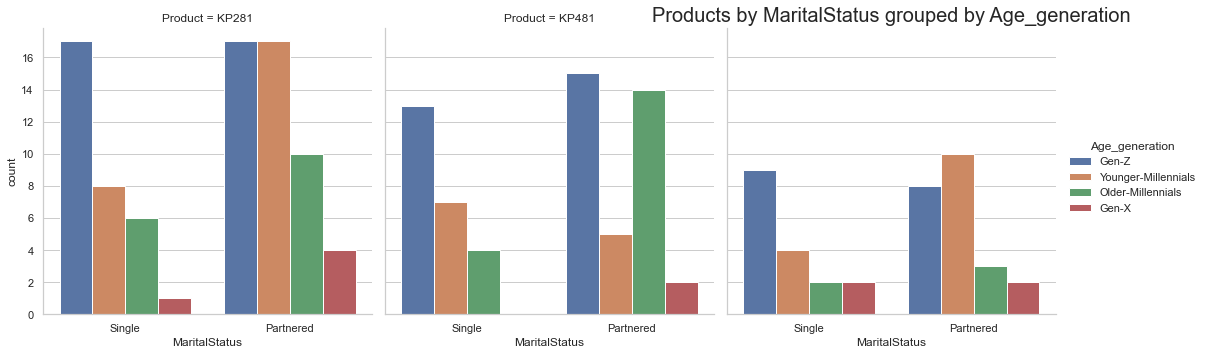

<Figure size 576x360 with 0 Axes>

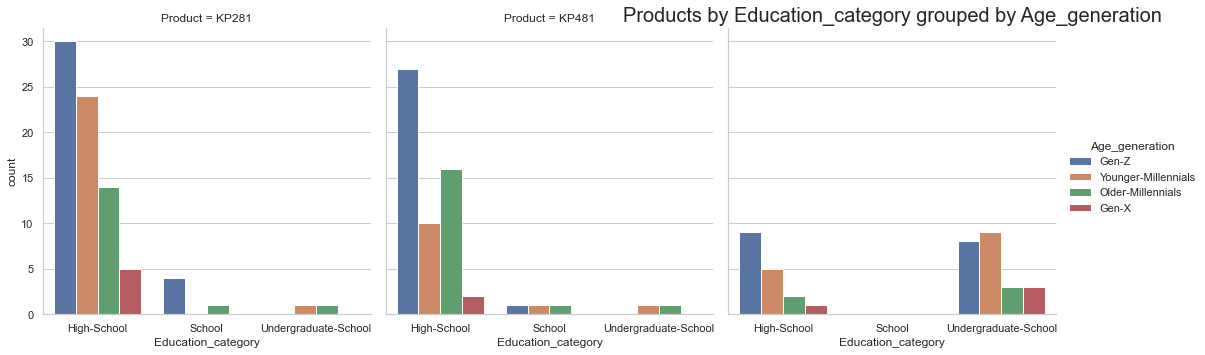

<Figure size 576x360 with 0 Axes>

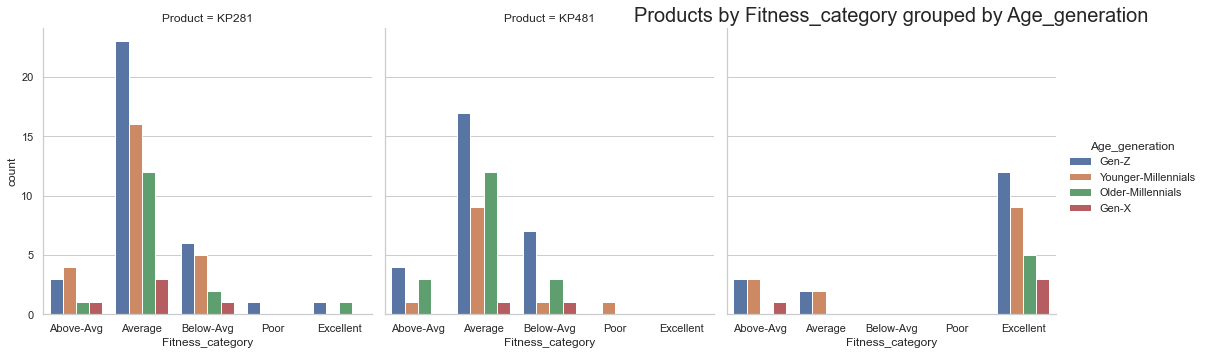

<Figure size 576x360 with 0 Axes>

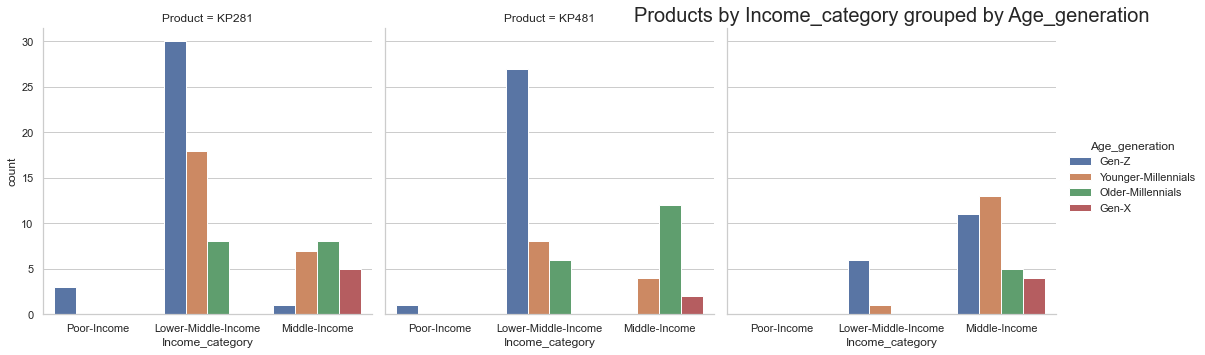

In [443]:
plot_products_by_multiple_categories(categorical_features,"Age_generation")

<Figure size 576x360 with 0 Axes>

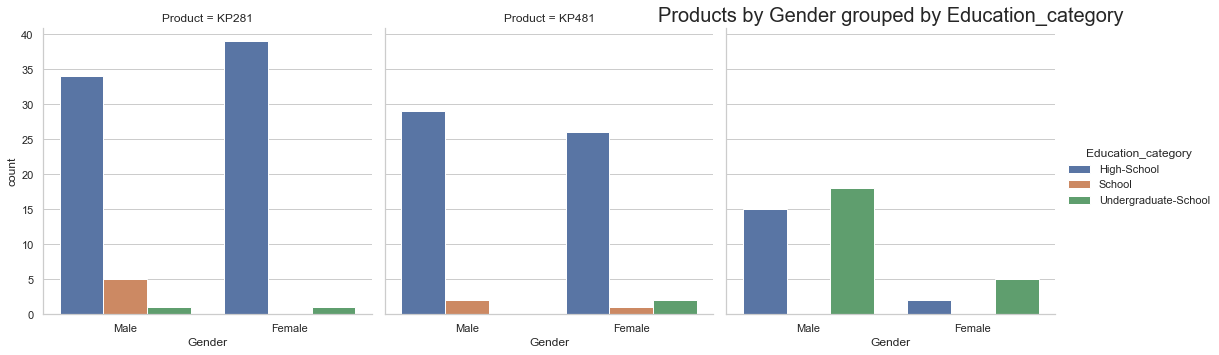

<Figure size 576x360 with 0 Axes>

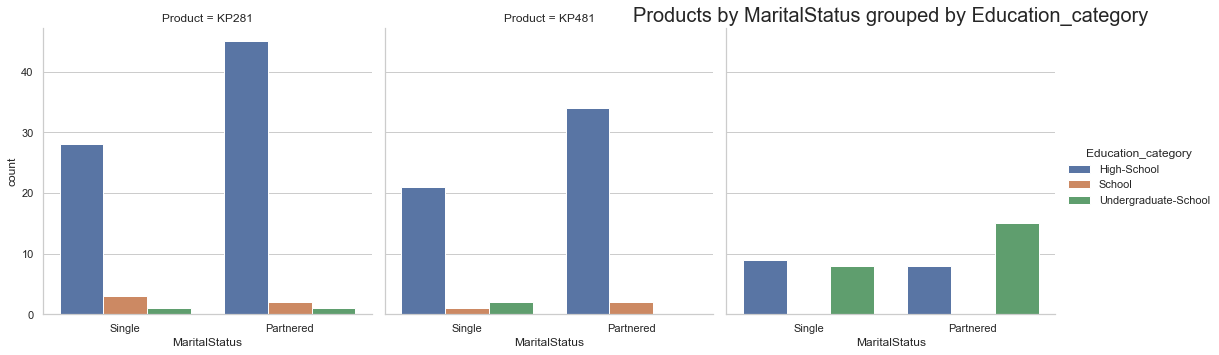

<Figure size 576x360 with 0 Axes>

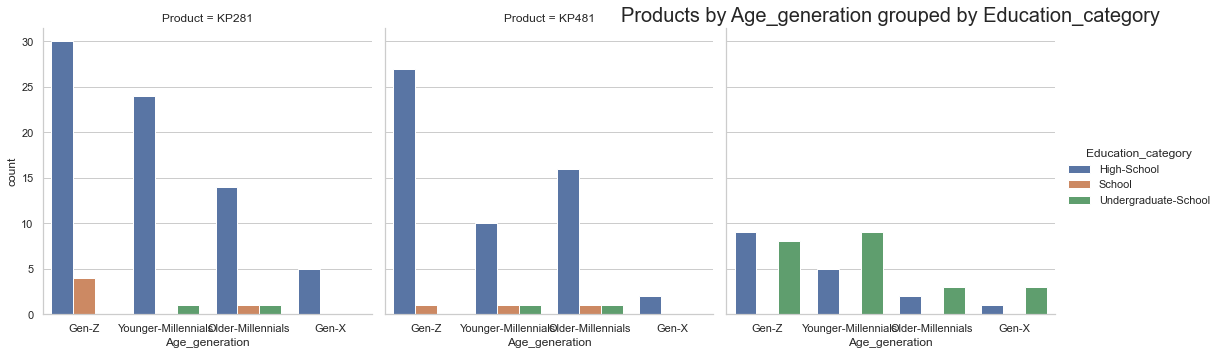

<Figure size 576x360 with 0 Axes>

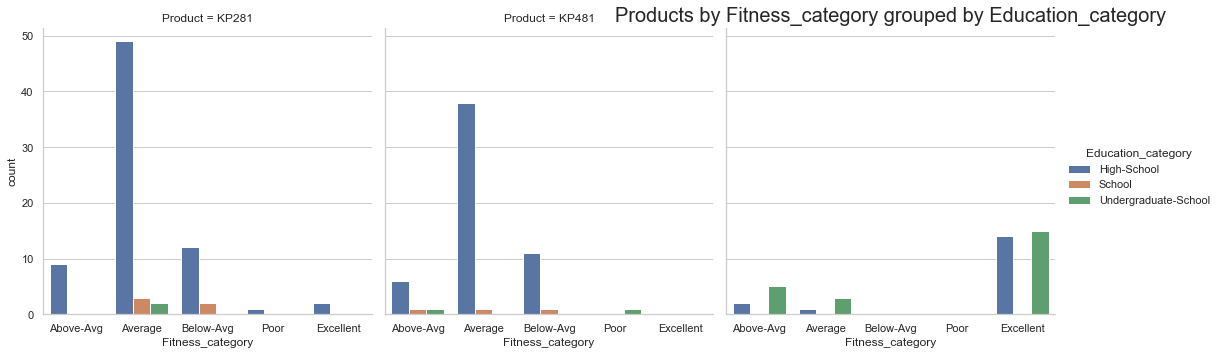

<Figure size 576x360 with 0 Axes>

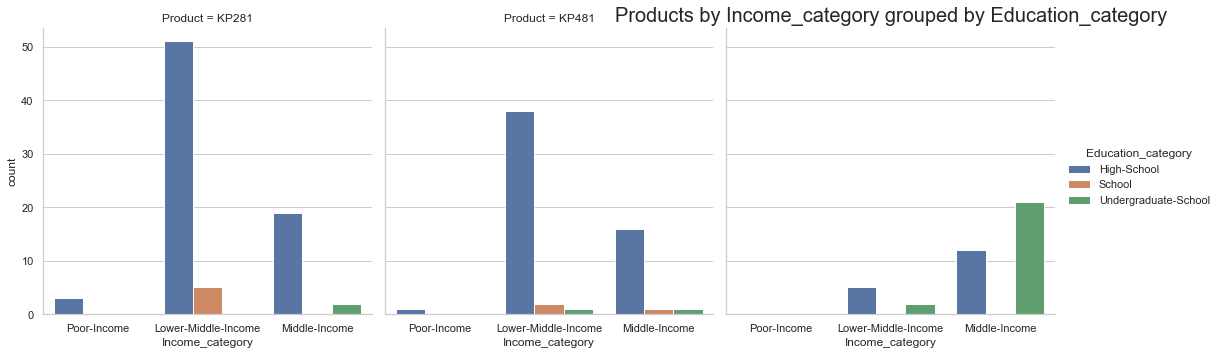

In [444]:
plot_products_by_multiple_categories(categorical_features,"Education_category")

<Figure size 576x360 with 0 Axes>

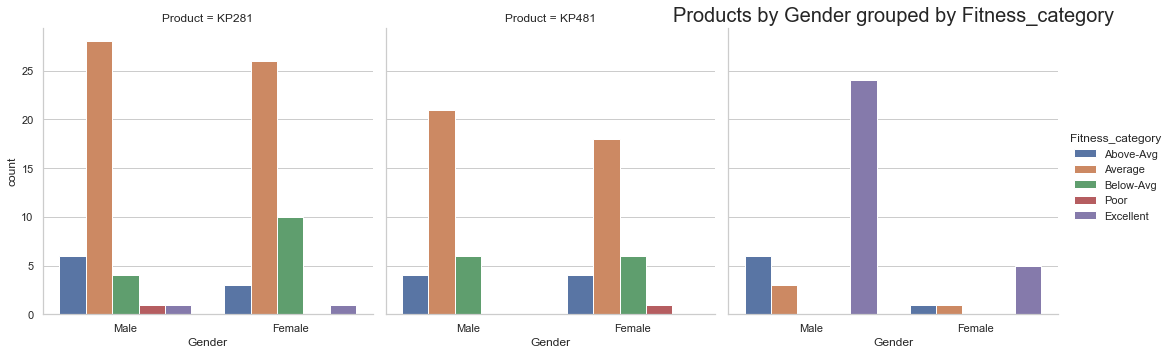

<Figure size 576x360 with 0 Axes>

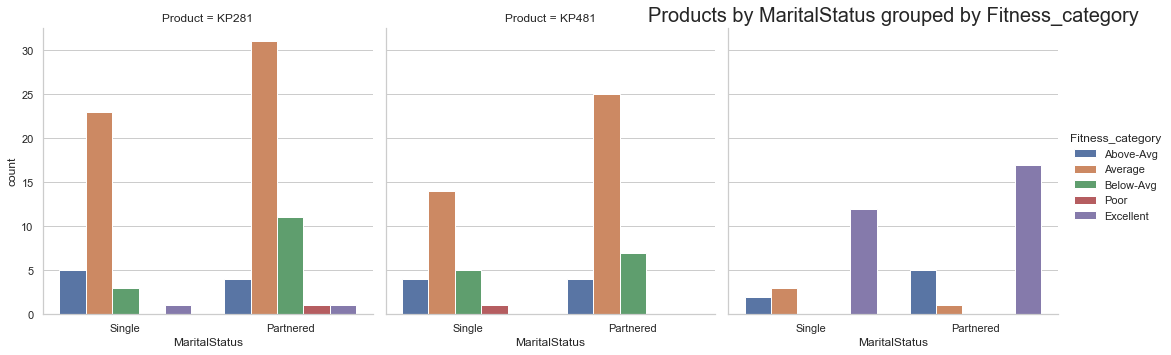

<Figure size 576x360 with 0 Axes>

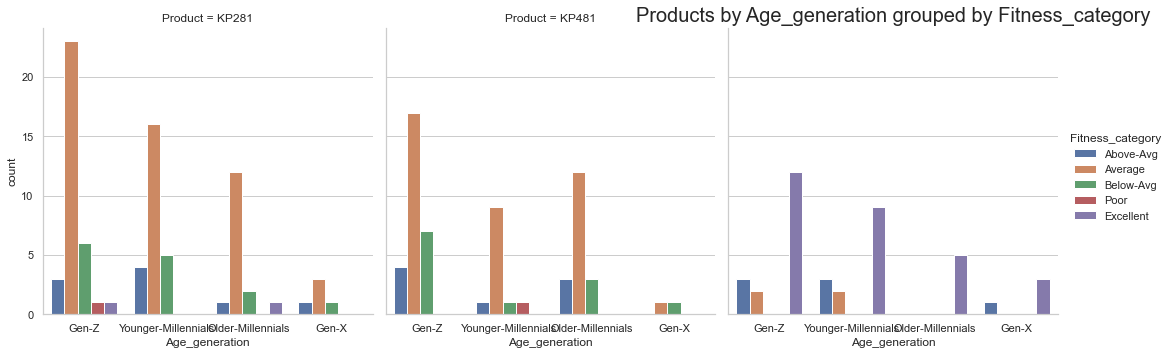

<Figure size 576x360 with 0 Axes>

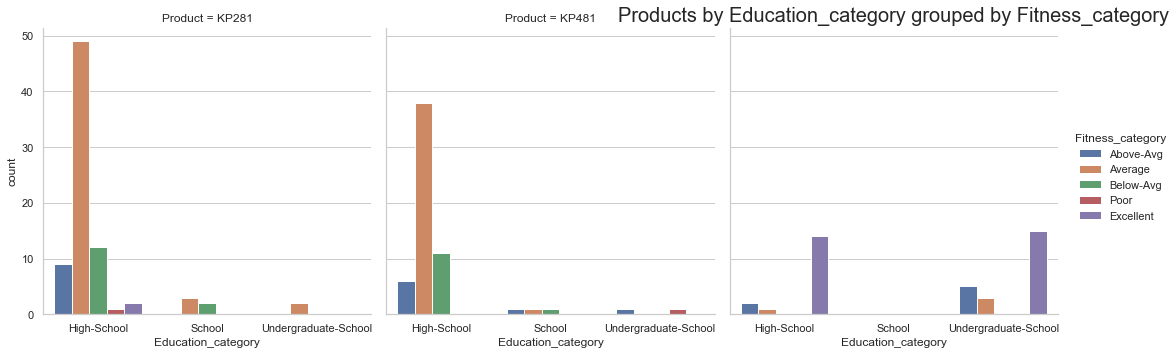

<Figure size 576x360 with 0 Axes>

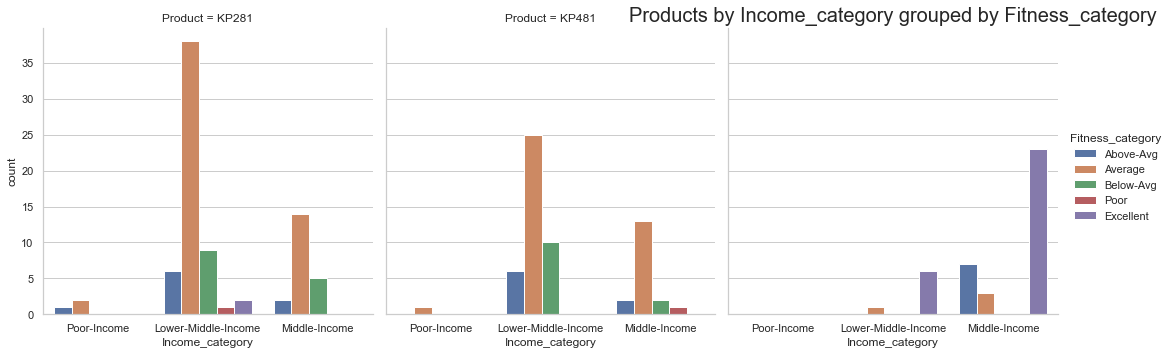

In [445]:
plot_products_by_multiple_categories(categorical_features,"Fitness_category")

<Figure size 576x360 with 0 Axes>

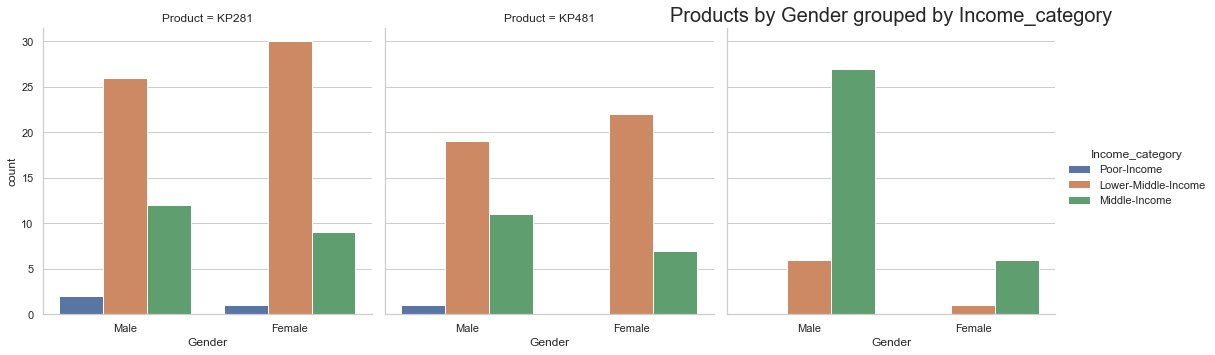

<Figure size 576x360 with 0 Axes>

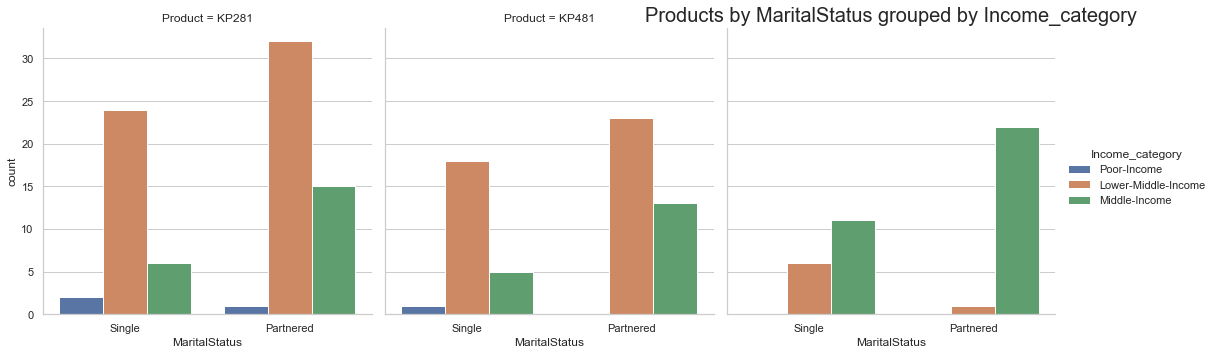

<Figure size 576x360 with 0 Axes>

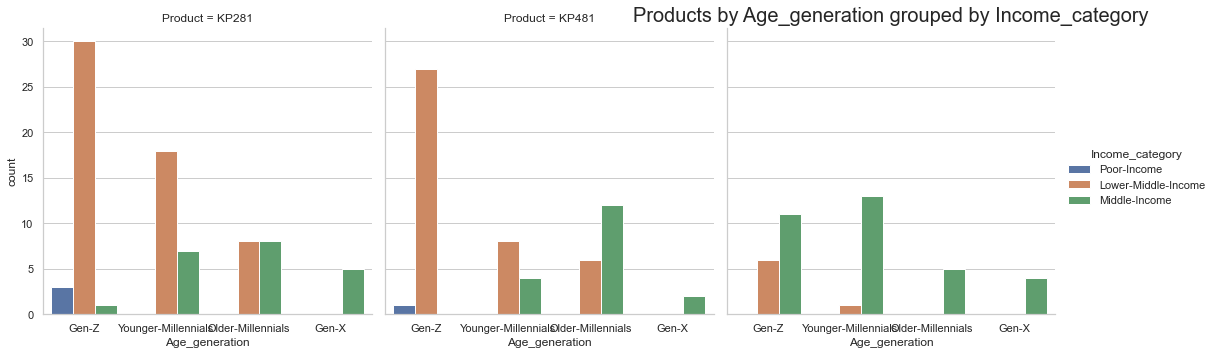

<Figure size 576x360 with 0 Axes>

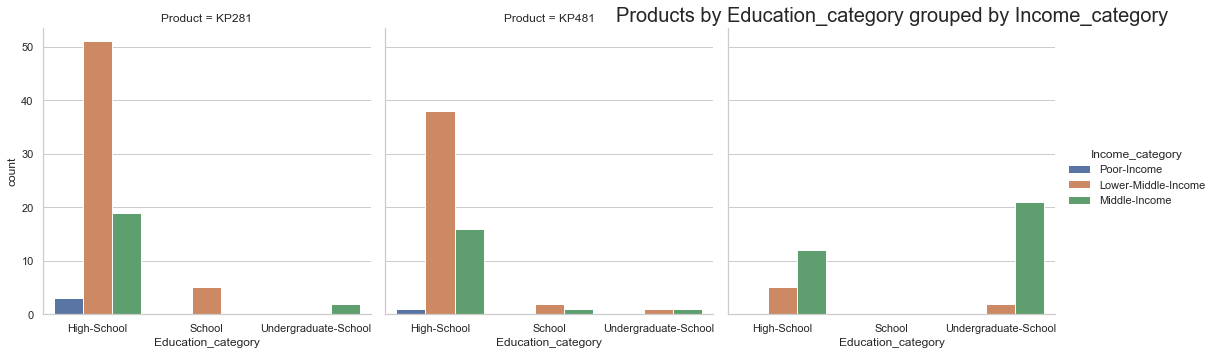

<Figure size 576x360 with 0 Axes>

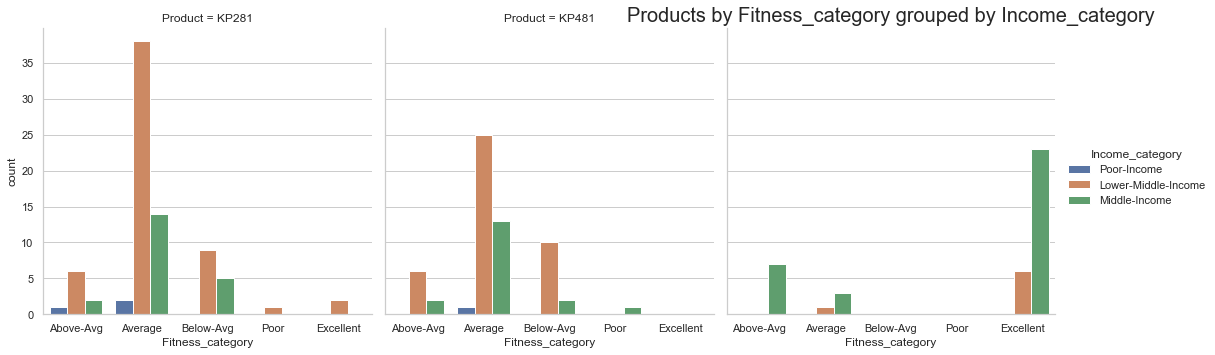

In [446]:
plot_products_by_multiple_categories(categorical_features,"Income_category")

In [417]:
categorical_features

Index(['Product', 'Gender', 'MaritalStatus', 'Age_generation',
       'Education_category', 'Fitness_category', 'Income_category'],
      dtype='object')

- For **correlation**: **Heatmaps**, **Pairplots**
 - Age 
 - Usage 
 - Fitness
 - Income
 - Miles

<AxesSubplot:>

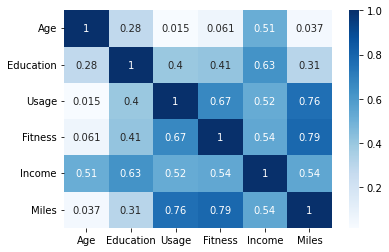

In [349]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

[]

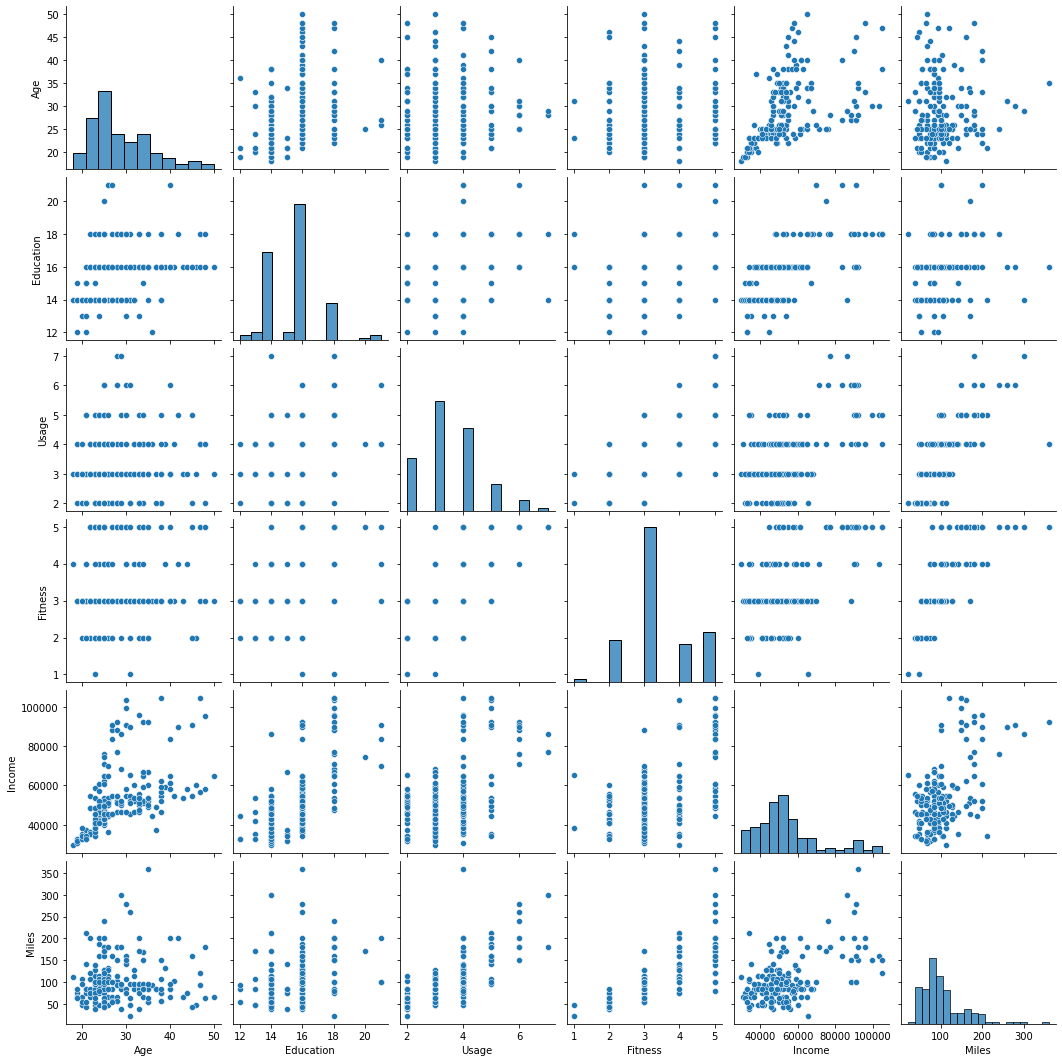

In [350]:
sns.pairplot(data=df)
plt.plot()

### Missing Value & Outlier Detection

- **Missing value detection** 

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

- **Outlier detection** 

In [ ]:
def find_outliers_IQR(column_name):
    print("Outliers by feature name --> ",column_name)
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)

    IQR=Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[((df[column_name]<lower) | (df[column_name]>upper))]

    return outliers

In [ ]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

In [368]:
outlier_df_by_age = find_outliers_IQR("Age")
outlier_df_by_age

Outliers by feature name -->  Age


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
78,KP281,47,Male,16,Partnered,4,3,56850,94,Gen-X,High-School,Average,Middle-Income
79,KP281,50,Female,16,Partnered,3,3,64809,66,Gen-X,High-School,Average,Middle-Income
139,KP481,48,Male,16,Partnered,2,3,57987,64,Gen-X,High-School,Average,Middle-Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,Gen-X,Undergraduate-School,Excellent,Middle-Income
179,KP781,48,Male,18,Partnered,4,5,95508,180,Gen-X,Undergraduate-School,Excellent,Middle-Income


In [369]:
outlier_df_by_education = find_outliers_IQR("Education")
outlier_df_by_education

Outliers by feature name -->  Education


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
156,KP781,25,Male,20,Partnered,4,5,74701,170,Gen-Z,Undergraduate-School,Excellent,Middle-Income
157,KP781,26,Female,21,Single,4,3,69721,100,Younger-Millennials,Undergraduate-School,Average,Middle-Income
161,KP781,27,Male,21,Partnered,4,4,90886,100,Younger-Millennials,Undergraduate-School,Above-Avg,Middle-Income
175,KP781,40,Male,21,Single,6,5,83416,200,Older-Millennials,Undergraduate-School,Excellent,Middle-Income


In [370]:
outlier_df_by_usage = find_outliers_IQR("Usage")
outlier_df_by_usage

Outliers by feature name -->  Usage


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
154,KP781,25,Male,18,Partnered,6,4,70966,180,Gen-Z,Undergraduate-School,Above-Avg,Middle-Income
155,KP781,25,Male,18,Partnered,6,5,75946,240,Gen-Z,Undergraduate-School,Excellent,Middle-Income
162,KP781,28,Female,18,Partnered,6,5,92131,180,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
163,KP781,28,Male,18,Partnered,7,5,77191,180,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
164,KP781,28,Male,18,Single,6,5,88396,150,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
166,KP781,29,Male,14,Partnered,7,5,85906,300,Younger-Millennials,High-School,Excellent,Middle-Income
167,KP781,30,Female,16,Partnered,6,5,90886,280,Younger-Millennials,High-School,Excellent,Middle-Income
170,KP781,31,Male,16,Partnered,6,5,89641,260,Younger-Millennials,High-School,Excellent,Middle-Income
175,KP781,40,Male,21,Single,6,5,83416,200,Older-Millennials,Undergraduate-School,Excellent,Middle-Income


In [371]:
outlier_df_by_fitness = find_outliers_IQR("Fitness")
outlier_df_by_fitness

Outliers by feature name -->  Fitness


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
14,KP281,23,Male,16,Partnered,3,1,38658,47,Gen-Z,High-School,Poor,Lower-Middle-Income
117,KP481,31,Female,18,Single,2,1,65220,21,Younger-Millennials,Undergraduate-School,Poor,Middle-Income


In [372]:
outlier_df_by_income = find_outliers_IQR("Income")
outlier_df_by_income

Outliers by feature name -->  Income


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
159,KP781,27,Male,16,Partnered,4,5,83416,160,Younger-Millennials,High-School,Excellent,Middle-Income
160,KP781,27,Male,18,Single,4,3,88396,100,Younger-Millennials,Undergraduate-School,Average,Middle-Income
161,KP781,27,Male,21,Partnered,4,4,90886,100,Younger-Millennials,Undergraduate-School,Above-Avg,Middle-Income
162,KP781,28,Female,18,Partnered,6,5,92131,180,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
164,KP781,28,Male,18,Single,6,5,88396,150,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
166,KP781,29,Male,14,Partnered,7,5,85906,300,Younger-Millennials,High-School,Excellent,Middle-Income
167,KP781,30,Female,16,Partnered,6,5,90886,280,Younger-Millennials,High-School,Excellent,Middle-Income
168,KP781,30,Male,18,Partnered,5,4,103336,160,Younger-Millennials,Undergraduate-School,Above-Avg,Middle-Income
169,KP781,30,Male,18,Partnered,5,5,99601,150,Younger-Millennials,Undergraduate-School,Excellent,Middle-Income
170,KP781,31,Male,16,Partnered,6,5,89641,260,Younger-Millennials,High-School,Excellent,Middle-Income


In [373]:
outlier_df_by_miles = find_outliers_IQR("Miles")
outlier_df_by_miles

Outliers by feature name -->  Miles


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_generation,Education_category,Fitness_category,Income_category
23,KP281,24,Female,16,Partnered,5,5,44343,188,Gen-Z,High-School,Excellent,Lower-Middle-Income
84,KP481,21,Female,14,Partnered,5,4,34110,212,Gen-Z,High-School,Above-Avg,Lower-Middle-Income
142,KP781,22,Male,18,Single,4,5,48556,200,Gen-Z,Undergraduate-School,Excellent,Lower-Middle-Income
148,KP781,24,Female,16,Single,5,5,52291,200,Gen-Z,High-School,Excellent,Lower-Middle-Income
152,KP781,25,Female,18,Partnered,5,5,61006,200,Gen-Z,Undergraduate-School,Excellent,Middle-Income
155,KP781,25,Male,18,Partnered,6,5,75946,240,Gen-Z,Undergraduate-School,Excellent,Middle-Income
166,KP781,29,Male,14,Partnered,7,5,85906,300,Younger-Millennials,High-School,Excellent,Middle-Income
167,KP781,30,Female,16,Partnered,6,5,90886,280,Younger-Millennials,High-School,Excellent,Middle-Income
170,KP781,31,Male,16,Partnered,6,5,89641,260,Younger-Millennials,High-School,Excellent,Middle-Income
171,KP781,33,Female,18,Partnered,4,5,95866,200,Older-Millennials,Undergraduate-School,Excellent,Middle-Income


### Business Insights based on Non-Graphical and Visual Analysis

- **Comments Non Graphical Analysis**
 - 180 samples seems to be too less to predict behaviour of the population. Small sample size **reduces the power of the study and increases the margin of error**
 - **Overall Data spread** **not uniform** , very much **right skewed in age range 33-50+)** .Need to **transform the skewed data to close enough to a Gaussian distribution or Normal distribution**. This **will allow us to try more number of statistical model** to apply.
      - Less samples for age group more than 41 years of age (i.e. Generation X )
      - Less samples for High income group
      - Less samples for school students - most of the data is for Undergrad or High school students
      - Less samples for Poor income group
 - **Outliers** - Need to exclude following outliers otherwise it would **decrease normality**. It **increases the error variance** and **reduces the power of statistical tests**. They can **cause bias and/or influence estimates**. They can also **impact the basic assumption of regression as well as other statistical models**.
      - Miles -        13 samples (i.e 7% of samples) are beyond 1.5 times IQR 
      - Income group - 19 samples out of 180 (i.e. ~ 10%) are outliers which can impact the analysis/prediction 
      - Usage -        9 outliers
 - **Strong Correlation** between few independent features hence **change in one variable would cause change to another and so the model results fluctuate significantly**. The **model results** will be **unstable** and vary a lot given a small change in the data or model 
      - Miles vs Usage (0.76) **[Strong correlation]**
      - Miles vs Fitness(0.79)**[Strong correlation]**
      - Miles vs Income(0.54) [Moderate correlation]
      - Education vs Income(0.63) [Moderate correlation]
      - Education vs Fitness(0.41)[Low correlation] 

### Recommendations

- **Key considerations**:
 - Below recommedation will be more effective when above analysis has been considered i.e. more samples are being considered ,outliers have been transformed, and apprppriate measures have been taken for skeweness/correlation treatments. 


- **Actionable items for business**
 -  **Gender based targeted channel** would be **more effective**
        - **Females** (across all generations **except older millennials**) like **KP281** . 
        - **Undergraduate (education years 18-21) Females** prefer product **KP781**
        - **High School(education years 14-17) Males** prefer only **KP281/KP481**
 -  **Generation based targeted channels** can contribute to productive sales
        - **Generation-Z**(i.e. 10-25 years of age) (including both **Single** and **Partnered**) likes product **KP281**
        - **Older Millennialls** (age 33-40) with **middle income** category should be targeted for product **KP481**
 -  **Marital status** - **Partnered** clients **likely to buy more products(across categories) than** than **"Single"**
        - **Partnered & Younger millennials**(age 25 - 32) : **First choice KP281 , Second choice KP781**
        - **Partnered & Older millennials**(age 33 - 41)   : **First choice KP481**
        - **Partnered & Gen-X**(age 42 - 57)               : **First choice KP281**
 -  **High School(education years 14-17) students, across generations** - More likely to buy a **low range product**
        - Equally likes product **KP281 and K481**
 -  **Under Garduate**(education years 18-21) - More likely to buy a **high range** product
        - Both **Generation-Z(age 10-25) and Younger millennials (age 26-32)** more frequently purchase product **KP781**
 -  **Fitness** level - Excellent fitness level clients should be targeted for high range products
        - **Average fitness** (across generations) - **1st choice (KP281) , Second choice KP481**
        - **Excellent fitness** - prefers **KP781**
 -  **Income category** - 
        - **Lower Income**  -  1st choice **KP281** 2nd choice **KP481**
        - **Middle Income** -  1st choice **KP481**